# Checkpoint web scraping

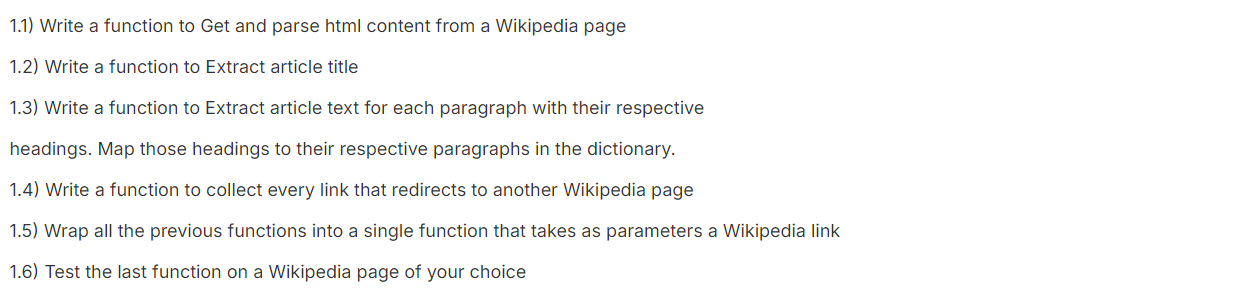

In [ ]:
import requests
from bs4 import BeautifulSoup

1.1) Function to get and parse HTML content


In [ ]:
def get_html_content(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup

In [ ]:
wikipedia_url = "https://en.wikipedia.org/wiki/Web_scraping"
get_html_content(wikipedia_url)

1.2) Function to extract article title


In [ ]:
def extract_title(soup):
    title = soup.select('h1#firstHeading')
    return title[0].text.strip() if title else "Title not found"

In [ ]:
extract_title(get_html_content(wikipedia_url))

1.3) Write a function to Extract article text for each paragraph with their respective
headings. Map those headings to their respective paragraphs in the dictionary.


In [ ]:
soup = get_html_content(wikipedia_url)
content = soup.select('div#mw-content-text')
# If the content is empty, return an empty dictionary
if len(content) == 0:
    final_result = {}
else :
    # Dictionary to store extracted headings and their associated paragraphs
    result = {}
    # Variable to keep track of the current heading
    current_heading = None
    # Loop through all <h2>, <h3>, and <p> elements inside the main content area
    # <h2>, <h3> : subtitles, <p> : paragraph
    for element in content[0].select('h2, h3, p'):
        # If the element is a heading (h2 or h3), set it as the current heading
        # print(element.name)
        if element.name in ['h2', 'h3']:
            # print(element.name)
            # print(element.text)
            current_heading = element.text.strip().replace("[edit]", "")  # Clean the heading text
            result[current_heading] = []  # Initialize an empty list for paragraphs under this heading
            # print(current_heading)
            # print(result)
#         # If the element is a paragraph (p) and there is an active heading
        elif element.name == 'p' and current_heading is not None:
            result[current_heading].append(element.text.strip())  # Store paragraph text under the current heading
            # print(current_heading)
            # print(result)
# print(result)
# result
#     # Flatten the list of paragraphs into a single string for each heading
final_result = {}
for heading, paragraphs in result.items():
    final_result[heading] = ' '.join(paragraphs)  # Join paragraphs into one text block per heading
print(final_result)


In [ ]:
mod_res = ['hello','hi','hey']
s = ' '.join(paragraphs)
s

In [ ]:
res = {1:['hello','hi','hey'],2:['bye','good bye']}
mod_res = {}
print(res)
for heading, paragraphs in res.items():
    mod_res[heading] = ' '.join(paragraphs)
print(mod_res)

In [ ]:
def extract_headings_and_paragraphs(soup):
    """
    Extracts headings (h2, h3) and their associated paragraphs (p) from a Wikipedia-style page.
    Args: soup (BeautifulSoup): A BeautifulSoup object containing parsed HTML content.
    Returns:
    dict: A dictionary where keys are headings and values are the concatenated text of paragraphs under them.
    """
    content = soup.select('div#mw-content-text')
    # If the content is empty, return an empty dictionary
    if len(content) == 0:
        return {}

    # Dictionary to store extracted headings and their associated paragraphs
    result = {}
    # Variable to keep track of the current heading
    current_heading = None
    # Loop through all <h2>, <h3>, and <p> elements inside the main content area
    # <h2>, <h3> : subtitles, <p> : paragraph
    for element in content[0].select('h2, h3, p'):
        # If the element is a heading (h2 or h3), set it as the current heading
        if element.name in ['h2', 'h3']:
            current_heading = element.text.strip().replace("[edit]", "")  # Clean the heading text
            result[current_heading] = []  # Initialize an empty list for paragraphs under this heading

        # If the element is a paragraph (p) and there is an active heading
        elif element.name == 'p' and current_heading is not None:
            result[current_heading].append(element.text.strip())  # Store paragraph text under the current heading

    # Flatten the list of paragraphs into a single string for each heading
    final_result = {}
    for heading, paragraphs in result.items():
        final_result[heading] = ' '.join(paragraphs)  # Join paragraphs into one text block per heading

    return final_result


In [ ]:
extract_headings_and_paragraphs(get_html_content(wikipedia_url))

1.4)  Write a function to collect every link that redirects to another Wikipedia page


In [ ]:
def extract_wikipedia_links(soup, base_url="https://en.wikipedia.org"):
    """
    Extracts Wikipedia article links from a BeautifulSoup object.
    Args:
        soup (BeautifulSoup): Parsed HTML content.
        base_url (str): Base URL of Wikipedia (default: "https://en.wikipedia.org").
    Returns:
        list: A list of unique Wikipedia article links.
    """
    links = set()
    # Use .select() to find all anchor tags with an href attribute
    for link in soup.select('a[href]'):
        href = link['href']

        # Check if the link is a valid Wikipedia article link (not a special page)
        if href.startswith('/wiki/') and not href.startswith('/wiki/Special:'):
            full_url = base_url + href  # Simple concatenation
            links.add(full_url)

    return list(links)


In [ ]:
soup = get_html_content(wikipedia_url)
extract_wikipedia_links(soup)

1.5) Wrap all the previous functions into a single function that takes as parameters a Wikipedia link


In [ ]:
def process_wikipedia_page(url):
    soup = get_html_content(url)

    # Step-by-step processing
    title = extract_title(soup)
    headings_and_paragraphs = extract_headings_and_paragraphs(soup)
    wikipedia_links = extract_wikipedia_links(soup)

    return {
        "title": title,
        "headings_and_paragraphs": headings_and_paragraphs,
        "wikipedia_links": wikipedia_links
    }

In [ ]:
process_wikipedia_page("https://en.wikipedia.org/wiki/Web_scraping")

1.6) Test the last function on a Wikipedia page of your choice


https://en.wikipedia.org/wiki/Web_scraping

In [ ]:
# Replace with a Wikipedia page of your choice
wikipedia_url = "https://en.wikipedia.org/wiki/Web_scraping"
result = process_wikipedia_page(wikipedia_url)

print("Title of the Article:", result['title'])
print("Headings and Paragraphs:")
for heading, text in result['headings_and_paragraphs'].items():
    print(f"{heading}:\n{text}\n\n")

print("Wikipedia Links:")
for link in result['wikipedia_links'][:10]:  # Show only first 10 links for brevity
    print(link)